In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import Sequential
import os
from PIL import Image
import keras.utils as image

import cv2
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# Evaluasi model
import numpy as np
import matplotlib.pyplot as plt


In [66]:
# jgn lupa ganti alamat model
model = tf.keras.models.load_model('zmodel\h5 copy\sapifitmobilenet1.h5') 

Found 28 images belonging to 2 classes.
1/1 [==============================] - 1s 790ms/step
Confusion Matrix:
[[19  0]
 [ 1  8]]
1/1 [==============================] - 1s 531ms/step


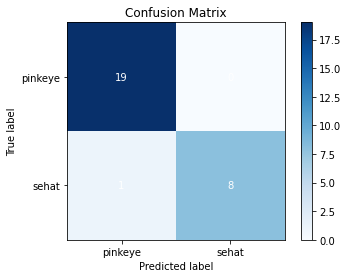

In [71]:
# Path ke direktori dataset test
test_dir = r'D:\BANGKIT2023\CAPSTONE\sapiseimbang\test'

# Konfigurasi
image_size = 224  # Ukuran gambar yang digunakan dalam model (jgn ubah)
batch_size = 32

# Preprocessing gambar test menggunakan ImageDataGenerator
# yang tes cmn rescale aja
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Generate predictions for the test set
test_images, test_labels = test_generator.next()  # Retrieve a batch of test images and labels
predictions = model.predict(test_images)  # Make predictions on the test images

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)



# Generate predictions for the test set
test_images, test_labels = test_generator.next()  # Retrieve a batch of test images and labels
predictions = model.predict(test_images)  # Make predictions on the test images

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the confusion matrix as a table
im = ax.imshow(cm, cmap='Blues')

# Customize the plot
ax.set_xticks(np.arange(len(cm[0])))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(['pinkeye', 'sehat'])
ax.set_yticklabels(['pinkeye', 'sehat'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add labels to each cell in the table
for i in range(len(cm)):
    for j in range(len(cm[0])):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='white')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()

1/1 [==============================] - 1s 550ms/step
Confusion Matrix:
[[19  0]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.89      0.94         9

    accuracy                           0.96        28
   macro avg       0.97      0.94      0.96        28
weighted avg       0.97      0.96      0.96        28



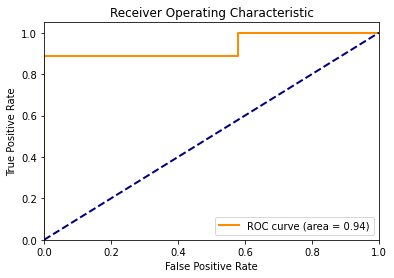

In [68]:
# Generate predictions for the test set
test_images, test_labels = test_generator.next()
predictions = model.predict(test_images)

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(test_labels, predicted_labels)
print("Classification Report:")
print(report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 50ms/step


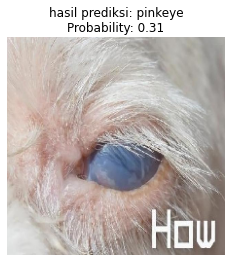

In [69]:
# ambil dan prepros
image_size = 224
test_image_path = r'sapi\test\pinkeye\Copy-of-Copy-of-00000110_jpg.rf.059459449da2b566ac2ed1aedab20613.jpg'  # Replace with the path to your test image
test_image = image.load_img(test_image_path, target_size=(image_size, image_size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image



# Memprediksi
predictions = model.predict(test_image)

# probability
predicted_class = "pinkeye" if predictions[0][0] < 0.5 else "sehat"  # Replace with your class labels
probability = predictions[0][0]

# tampil
plt.imshow(test_image[0])
plt.title(f'hasil prediksi: {predicted_class}\nProbability: {probability:.2f}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 67ms/step


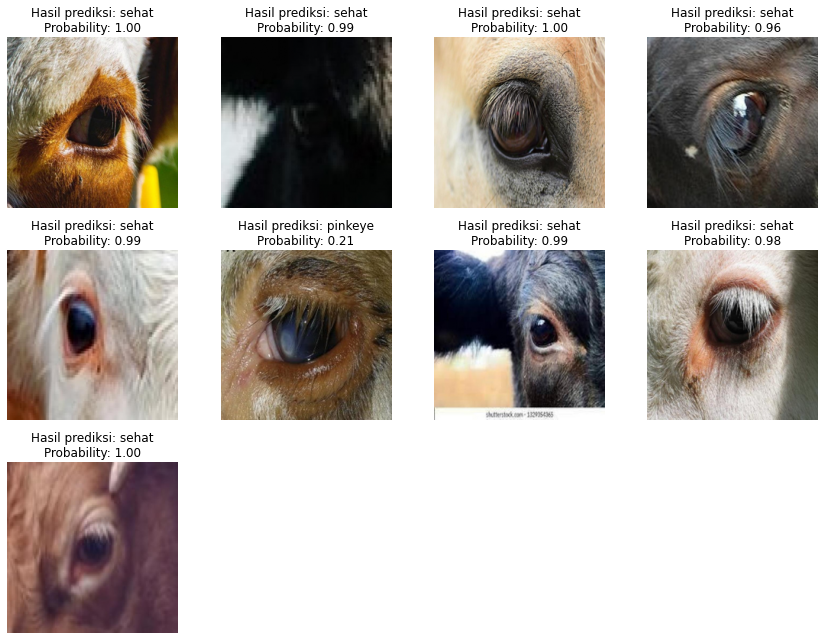

In [70]:
# Mendapatkan daftar semua file gambar dalam folder tes
folder_path = r'D:\BANGKIT2023\CAPSTONE\sapiseimbang\test\sehat'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Mengatur ukuran subplot berdasarkan jumlah gambar
num_images = len(image_files)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

# Loop melalui setiap file gambar
for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)

    # Memuat dan memproses gambar
    test_image = Image.open(image_path)
    test_image = test_image.resize((image_size, image_size))
    test_image = np.array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalize the image

    # Memprediksi
    predictions = model.predict(test_image)

    # Probability dan kelas prediksi
    predicted_class = "pinkeye" if predictions[0][0] < 0.5 else "sehat"  # Replace with your class labels
    probability = predictions[0][0]

    # Menampilkan gambar dan hasil prediksi dalam subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(test_image[0])
    ax.set_title(f'Hasil prediksi: {predicted_class}\nProbability: {probability:.2f}')
    ax.axis('off')

# Menghapus subplot yang tidak digunakan
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

